In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def window_mean(all_rewards, window):
    average_rewards = np.zeros(np.array(all_rewards).shape)
    for idx, rewards in enumerate(all_rewards):
        for i in range(len(rewards)):
            if i < window:
                average_rewards[idx, i] = np.mean(rewards[:i+1])
            else:
                average_rewards[idx, i] = np.mean(rewards[i-window:i])
    return np.mean(average_rewards, axis=0)

def compare_plot(all_rewards_1, all_rewards_2, name, threshold = -100):
    """
    Plots the rewards for Mean Dueling DQN and Max Dueling DQN over episodes.
    
    Parameters:
    all_rewards_1 (list): List of rewards for Mean Dueling DQN.
    all_rewards_2 (list): List of rewards for Max Dueling DQN.
    name (str): Name of the environment.
    
    Returns:
    None
    """
    std_dev_1 = np.std(all_rewards_1, axis=0)
    std_dev_2 = np.std(all_rewards_2, axis=0)
    all_rewards_1 = window_mean(all_rewards_1, 100)
    all_rewards_2 = window_mean(all_rewards_2, 100)
    x_1 = np.arange(0,len(all_rewards_1))
    x_2 = np.arange(0,len(all_rewards_2))
    plt.fill_between
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.plot(x_1, all_rewards_1, label='Without Baseline',color = 'blue')
    plt.plot(x_2, all_rewards_2, label='With Baseline', color = 'red')
    plt.fill_between(x_1,
                     np.array(all_rewards_1) - std_dev_1/2,
                     np.array(all_rewards_1) + std_dev_1/2,
                     color='blue', alpha=0.3, label='± 0.5 SD')
    plt.fill_between(x_2,
                     np.array(all_rewards_2) - std_dev_2/2,
                     np.array(all_rewards_2) + std_dev_2/2,
                     color='red', alpha=0.3, label='± 0.5 SD')
    threshold_array = np.full(len(all_rewards_1), threshold)
    plt.plot(threshold_array, 'g--', label='Threshold', color = 'black')

    plt.title(name)
    plt.legend()
    plt.show()

C:\Users\maste\AppData\Local\Temp\ipykernel_20932\547002500.py:43: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g--" (-> color='g'). The keyword argument will take precedence.
  plt.plot(threshold_array, 'g--', label='Threshold', color = 'black')


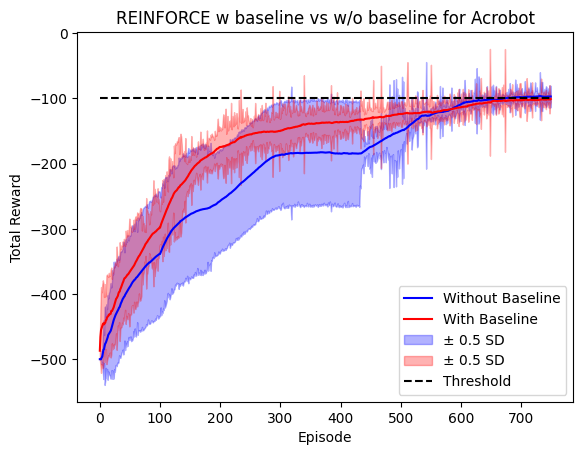

In [9]:
w_b = np.load("./plots/acrobot_with_baseline.npy")
wo_b = np.load("./plots/acrobot_without_baseline.npy")[0]
compare_plot(wo_b, w_b, "REINFORCE w baseline vs w/o baseline for Acrobot")